# FUNDAMENTOS DE PROCESAMIENTO DE SENALES

In [78]:
# Cell 0 - Preparation: load packages, set some basic options  
%matplotlib inline
from matplotlib import rcParams
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15, 7
rcParams["figure.subplot.hspace"] = (0.5)

In [79]:
from scipy.fftpack import hilbert
from scipy.signal import  iirfilter
from scipy.signal import sosfilt
from scipy.signal import zpk2sos

def lowpass(data, freq, df, corners=4, zerophase=False):
    """
    :type data: numpy.ndarray
    :param data: Data to filter.
    :param freq: Filter corner frequency.
    :param df: Sampling rate in Hz.
    :param corners: Filter corners / order.
    :param zerophase: If True, apply filter once forwards and once backwards.
        This results in twice the number of corners but zero phase shift in
        the resulting filtered trace.
    :return: Filtered data.
    """
    fe = 0.5 * df
    f = freq / fe
    z, p, k = iirfilter(corners, f, btype='lowpass', ftype='butter',
                        output='zpk')
    sos = zpk2sos(z, p, k)
    if zerophase:
        firstpass = sosfilt(sos, data)
        return sosfilt(sos, firstpass[::-1])[::-1]
    else:
        return sosfilt(sos, data)
    
def highpass(data, freq, df, corners=4, zerophase=False):
    """
    :type data: numpy.ndarray
    :param data: Data to filter.
    :param freq: Filter corner frequency.
    :param df: Sampling rate in Hz.
    :param corners: Filter corners / order.
    :param zerophase: If True, apply filter once forwards and once backwards.
        This results in twice the number of corners but zero phase shift in
        the resulting filtered trace.
    :return: Filtered data.
    """
    fe = 0.5 * df
    f = freq / fe
    
    z, p, k = iirfilter(corners, f, btype='highpass', ftype='butter',
                        output='zpk')
    sos = zpk2sos(z, p, k)
    if zerophase:
        firstpass = sosfilt(sos, data)
        return sosfilt(sos, firstpass[::-1])[::-1]
    else:
        return sosfilt(sos, data)
    
    
def bandpass(data, freqmin, freqmax, df, corners=4, zerophase=False):
    """
    :type data: numpy.ndarray
    :param data: Data to filter.
    :param freqmin: Pass band low corner frequency.
    :param freqmax: Pass band high corner frequency.
    :param df: Sampling rate in Hz.
    :param corners: Filter corners / order.
    :param zerophase: If True, apply filter once forwards and once backwards.
        This results in twice the filter order but zero phase shift in
        the resulting filtered trace.
    :return: Filtered data.
    """
    fe = 0.5 * df
    low = freqmin / fe
    high = freqmax / fe
    z, p, k = iirfilter(corners, [low, high], btype='band',
                        ftype='butter', output='zpk')
    sos = zpk2sos(z, p, k)
    if zerophase:
        firstpass = sosfilt(sos, data)
        return sosfilt(sos, firstpass[::-1])[::-1]
    else:
        return sosfilt(sos, data)

  

TEOREMA DE MUESTREO

El teorema de muestreo o "sampling theorem" establece que se requieren al menos 2 muestras por periodo para re-producir correctamente la freciencia mas alta de una senal. Por tanto se establece que la maxima frecuencia que contiene una senal es la mitad de la frecuencia de muestreo de la misma, la cual es conocida como frecuencia de Nyquist. 


$$
fN = \frac{1}{2\Delta t}\
$$

Intervalo de muestro, $\Delta t $, : Es la diferencia temporal de muestras consecutivas, de modo que t = $k \Delta t $ 

Periodo: El periodo es el inverso de la frecuencia, 

Frecuencia de muestro:es el inverso del intervalo de muestre is se representa por $Fs = \frac{1}{\Delta t}\$ en Hz.




Text(0, 0.5, 'Amplitude')

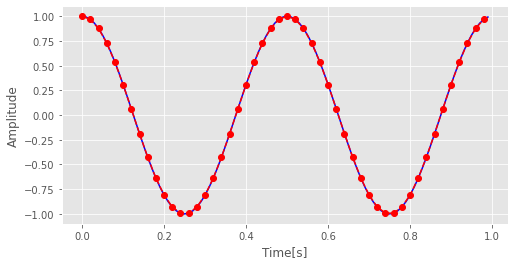

In [80]:
# Cell 1: downsampling + Nyquist
npts = 100                              # Numero de puntos                                  
fs = 100                                # frecuencia de muestreo en Hz
fNy = fs / 2.0                          # Frecuencia Nyquist 
f0 = 2                                  # Frecuencia de la funcion sinusiidal
time = np.arange(0,npts/fs,1/fs)        # verctor de tiempo en segundos
y  = np.cos(2 * np.pi * f0 * time)      # Funcion sinusoidal

intv = 2

y_res = y[::intv]
#-----------------------------------------------------------------------------------
# Calcular la tranformada rapida de Fourier --FFT
fw01 = np.fft.rfft(y)              # FFT de senal original
fw02 = np.fft.rfft(y_res)              # FFT de senal original
dt=1/fs
ny = 1/(2.*dt)
f01 = np.linspace(0, ny, len(fw01))    # vector de frecuencias
f02 = np.linspace(0, ny, len(fw02))    # vector de frecuencias
fig,ax0 = plt.subplots(figsize=(8,4))
ax0.plot(time,y,color='blue')
ax0.plot(time[::intv],y_res,'--o',color='red')
ax0.set_xlabel('Time[s]')
ax0.set_ylabel('Amplitude')


## Re-muestro y aliasing

Text(0, 0.5, 'Amplitude')

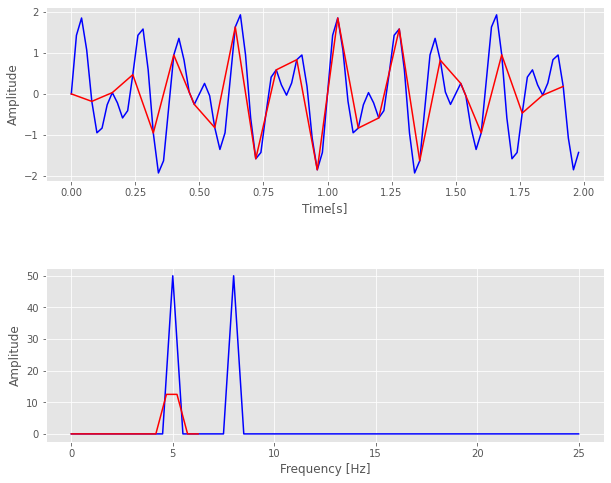

In [95]:
# Aliasing
npts = 100                             # Numero de puntos
fs = 50                                 # frecuencia de muestreo en Hz
fNy = fs / 2.0                          # Frecuencia Nyquist 
f0_1 = 5                                  # Frecuencia de la funcion sinusiidal
f0_2 = 8
time = np.arange(0,npts/fs,1/fs)        # verctor de tiempo en segundos
y  = np.sin(2 * np.pi * f0_1 * time) + np.sin(2 * np.pi * f0_2 * time)     # Funcion sinusoidal

intv = 4

y_res = y[::intv]
fig,(ax0,ax1) = plt.subplots(2,1,figsize=(10,8))
# filtro paso bajo
ax0.plot(time,y,color='blue')
ax0.plot(time[::intv],y_res,color='red')
ax0.set_xlabel('Time[s]')
ax0.set_ylabel('Amplitude')

# Calcular la tranformada rapida de Fourier --FFT
Y01 = np.fft.rfft(y)              # FFT de senal original
Y02 = np.fft.rfft(y_res)         # FFT de senal filtrada
dt=1/fs
ny = 1/(2.*dt)
f01 = np.linspace(0, ny, len(Y01))    # vector de frecuencias
ny02 = (fs/intv)/2
f02 = np.linspace(0, ny02, len(Y02))    # vector de frecuencias
ax1.plot(f01,abs(Y01),color='blue')
ax1.plot(f02,abs(Y02),color='red')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('Amplitude')


### Aliasing y Nyquist

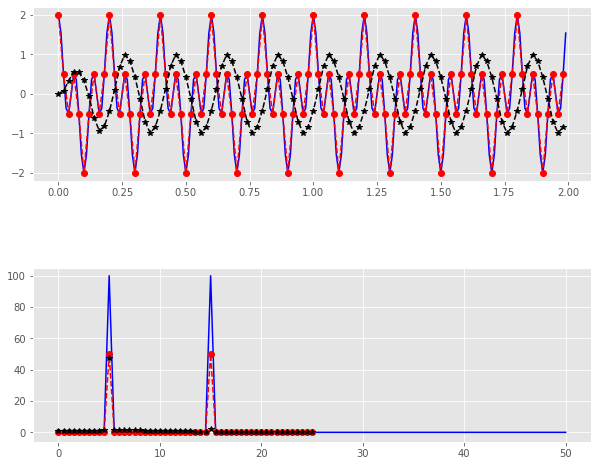

In [77]:
# Filtrado
npts = 200                             # Numero de puntos
fs = 100                                 # frecuencia de muestreo en Hz
fNy = fs / 2.0                          # Frecuencia Nyquist 
f0_1 = 5                                  # Frecuencia de la funcion sinusiidal
f0_2 = 15
time = np.arange(0,npts/fs,1/fs)        # verctor de tiempo en segundos
y  = np.cos(2 * np.pi * f0_1 * time) + np.cos(2 * np.pi * f0_2 * time)     # Funcion sinusoidal


# Filtrando senal
fc = 7
y_filt = lowpass(y, fc, fs, corners=4, zerophase=False)

#----------------------------------------------

y_down_01 = y[::2]        # Sin LPF
y_down_02 = y_filt[::2]   # Con LPF

fig,(ax0,ax1) = plt.subplots(2,1,figsize=(10,8))
ax0.plot(time,y,color='blue')
ax0.plot(time[::2],y_down_01,'--o',color='red')
ax0.plot(time[::2],y_down_02,'--*',color='black')

# filtro paso bajo


ax1.plot(time,y_filt)
#ax1.plot(time,y,color='blue')

# Calcular la tranformada rapida de Fourier --FFT

Y01 = np.fft.rfft(y)              # FFT de senal original
Y02 = np.fft.rfft(y_down_01)         # FFT de senal filtrada
Y03 = np.fft.rfft(y_down_02)         # FFT de senal filtrada
dt=1/fs
ny = 1/(2.*dt)
f = np.linspace(0, ny, len(Y01))    # vector de frecuencias

ax1.plot(f,abs(Y01),color='blue')
ax1.plot(f[:len(Y02)],abs(Y02),'--o',color='red')
ax1.plot(f[:len(Y03)],abs(Y03),'*',color='black')

